In [1]:
import numpy as np
import pandas as pd

In [4]:
cofe = pd.read_csv('/Users/marcia/Downloads/coffee.csv')
cofe.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


In [9]:
pd.set_option('display.max_columns', 9)
pd.set_option('display.max_rows', 200)

In [5]:
cofe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


In [22]:
# Rating column has 2 missing values, replace missing values with '0' 
cofe['Rating'].fillna(0, inplace=True) 
missing_count_rating  = cofe['Rating'].isnull().sum()
missing_count_rating

0

In [24]:
# Reviews has 2 missing values, replace 'overall_median'
overall_median = cofe['Reviews'].median()
cofe['Reviews'].fillna(overall_median, inplace=True)
missing_count_reviews  = cofe['Reviews'].isnull().sum()
missing_count_reviews

0

In [28]:
# Dine in option has 60 missing values, replace 'False'
cofe['Dine in option'].fillna(False, inplace=True)
missing_count_dine_option  = cofe['Dine in option'].isnull().sum()
missing_count_dine_option

0

In [30]:
# Takeout option has 56 missing values, replace 'False'
cofe['Takeout option'].fillna(False, inplace=True)
missing_count_takeout_option  = cofe['Takeout option'].isnull().sum()
missing_count_takeout_option

0

Submit your answers directly in the workspace provided.
1. For every column in the data:
a. State whether the values match the description given in the table above.
b. State the number of missing values in the column.
c. Describe what you did to make values match the description if they did notmatch.

In [33]:
# Region values match the description, no missing values.
cofe['Region'].value_counts()

C    20
J    20
F    20
B    20
A    20
E    20
D    20
G    20
I    20
H    20
Name: Region, dtype: int64

In [36]:
#  Place name values match the description, no missing values.
cofe['Place name'].value_counts().head()

Dim Kavy                   4
coffee House               3
Coffee House               3
MY COFFEE                  2
Lviv Coffee Manufacture    2
Name: Place name, dtype: int64

In [37]:
# Place type values match the description, no missing values.
cofe['Place type'].value_counts()

Coffee shop     97
Cafe            58
Others          25
Espresso bar    20
Name: Place type, dtype: int64

In [38]:
# Rating type values match the description, replace missing value '0'
cofe['Rating'].value_counts()

4.6    47
4.7    39
4.9    25
4.5    22
5.0    21
4.8    18
4.4    12
4.3     6
4.2     2
4.1     2
0.0     2
4.0     2
3.9     2
Name: Rating, dtype: int64

In [40]:
# Reviews type values match the description, missing value replace 'overall median'
cofe['Reviews'].value_counts().head()

10.0    5
15.0    4
18.0    4
40.0    3
14.0    3
Name: Reviews, dtype: int64

In [42]:
# Price type values match the description, no missing values.
cofe['Price'].value_counts()

$$     194
$$$      4
$        2
Name: Price, dtype: int64

In [43]:
# Delivery option type values match the description, missing value replace 'False'
cofe['Delivery option'].value_counts()

False    165
True      35
Name: Delivery option, dtype: int64

In [44]:
# Dine in option type values match the description, missing value replace 'False'
cofe['Dine in option'].value_counts()

True     140
False     60
Name: Dine in option, dtype: int64

In [45]:
#  Takeout option type values match the description, missing value replace 'False'
cofe['Takeout option'].value_counts()

True     144
False     56
Name: Takeout option, dtype: int64

Create a visualization that shows which is the most common type of coffee store. Use the visualization to:
a. State which category of the variable place type the most observations
b. Explain whether the observations are balanced across categories

Text(0.5, 1.0, 'Most Common Type of Coffee Store')

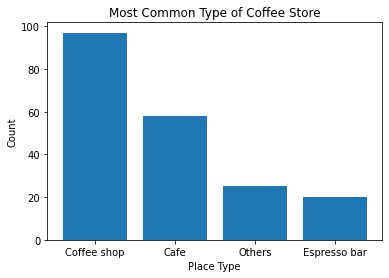

In [47]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in the 'place type' column
category_counts = cofe['Place type'].value_counts()

# Create a bar plot
plt.bar(category_counts.index, category_counts.values)

# Set labels and title
plt.xlabel('Place Type')
plt.ylabel('Count')
plt.title('Most Common Type of Coffee Store')

Conclusion: the most common type of coffee store is 'coffee shop' and
there is a significant difference in counts across categories, the observations may be unbalanced

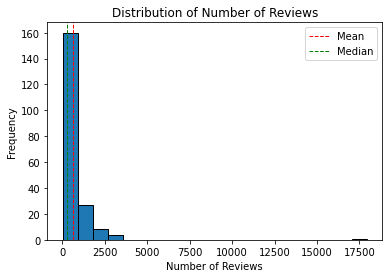

In [53]:
# Calculate statistical measures
reviews_mean = cofe['Reviews'].mean()
reviews_median = cofe['Reviews'].median()
reviews_std = cofe['Reviews'].std()

# Create a histogram plot
plt.hist(cofe['Reviews'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Reviews')

# Add mean and median lines
plt.axvline(reviews_mean, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(reviews_median, color='g', linestyle='dashed', linewidth=1, label='Median')

# Add legend
plt.legend()

# Display the plot
plt.show()



Distribution of the number of reviews is skewed to the right, the mean is greater than the median.

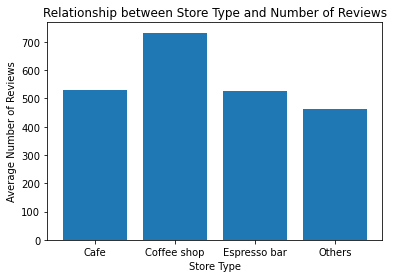

In [55]:
reviews_by_type = cofe.groupby('Place type')['Reviews'].mean()

# Create a bar plot
plt.bar(reviews_by_type.index, reviews_by_type)

# Add labels and title
plt.xlabel('Store Type')
plt.ylabel('Average Number of Reviews')
plt.title('Relationship between Store Type and Number of Reviews')

# Display the plot
plt.show()

# Describe the relationship between type of store and number of reviews. Your answer
must include a visualization to demonstrate the relationship. 
The store type that tends to receive the highest or lowest number of reviews on average are coffee shop and others, respectively